In [2]:
from huggingface_hub import notebook_login

notebook_login()

In [3]:
from datasets import load_dataset

dataset = load_dataset("arbml/Arabic_Sentiment_Twitter_Corpus")
dataset

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


data/train-00000-of-00001.parquet:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/783k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/47000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11751 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['tweet', 'label'],
        num_rows: 47000
    })
    test: Dataset({
        features: ['tweet', 'label'],
        num_rows: 11751
    })
})

In [4]:
dataset['train'][:5]

{'tweet': ['اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم بالزايد 😭',
  'توقعت اذا جات داريا بشوفهم كاملين بس لي للحين احس فيه احد ناقصهم 💔 #Avlu',
  '#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال والاهلي تحت التاق 👇 #تحدي_اسرع_روقان وادخل في سحب قيمة ايفون X على…',
  'نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين على بكتيريا 🦠 فتنفجر 💥 و تموت . الأخيرة يبدو انها بكتيريا مقاومة فأخذ…',
  'الدودو جايه تكمل علي 💔'],
 'label': [0, 0, 0, 0, 0]}

In [5]:
# Check for missing tweets or labels
for split in dataset.keys():
    missing_tweets = sum(1 for x in dataset[split]['tweet'] if x is None or x.strip() == "")
    missing_labels = sum(1 for x in dataset[split]['label'] if x is None)
    print(f"{split} - missing tweets: {missing_tweets}, missing labels: {missing_labels}")

train - missing tweets: 0, missing labels: 0
test - missing tweets: 0, missing labels: 0


In [6]:
# delete examples with missing tweets or labels
# def remove_missing(example):
#     return example['tweet'] is not None and example['tweet'].strip() != "" and example['label'] is not None

# dataset = dataset.filter(remove_missing)

In [7]:
# Example: check all unique labels
for split in dataset.keys():
    print(f"{split} labels:", set(dataset[split]['label']))


train labels: {0, 1}
test labels: {0, 1}


In [8]:
# Keep only examples with valid labels (0, 1)
# def filter_labels(example):
#     return example['label'] in [0,1,2]  # حسب عدد الفئات عندك

# dataset = dataset.filter(filter_labels)


In [9]:
def clean_text(example):
    text = example['tweet'].strip()  # remove leading/trailing spaces
    example['tweet'] = text
    return example

dataset = dataset.map(clean_text)


Map:   0%|          | 0/47000 [00:00<?, ? examples/s]

Map:   0%|          | 0/11751 [00:00<?, ? examples/s]

In [10]:
dataset['train'][:10]

{'tweet': ['اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم بالزايد 😭',
  'توقعت اذا جات داريا بشوفهم كاملين بس لي للحين احس فيه احد ناقصهم 💔 #Avlu',
  '#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال والاهلي تحت التاق 👇 #تحدي_اسرع_روقان وادخل في سحب قيمة ايفون X على…',
  'نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين على بكتيريا 🦠 فتنفجر 💥 و تموت . الأخيرة يبدو انها بكتيريا مقاومة فأخذ…',
  'الدودو جايه تكمل علي 💔',
  'أحببته حتى أقنعنى إن ما فات من العمر كان إنتظار له 🙈',
  'يبدو ان دجلة اعتادت على التهام اجساد ابنائها من سبايكر للعبارة ..👆👆💔 ما سمعته .. ان البشر يعطش فيشرب الماء .. لم…',
  'جالس أذاكر 😣',
  'يكفي استخفاف بالعقل العربي هل حقا الأمن والمخابرات في ألمانيا غير قادرة على وقف اي عصابة أو الجريمة 🤔 وا…',
  'ياليلل ترا اكلج كثير مشي 😭'],
 'label': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

In [11]:
tweets_sample = dataset['train'].shuffle(seed=42).select(range(100))
tweets_sample[:5]

{'tweet': ['بس ي مريم 😕 ارتباط اي استغفر الله ي بنتي😂😂احنا بتوع الكلام ده؟😁💔🚶',
  'للاسف نعم 😔',
  'لاقوة لي يارب ..فصبرني 💔',
  'البليهي أختصر مشاعر جمهور #الهلال تجاه عبدالله المعيوف ، شكرا من الأعماق 💙 !',
  'وكيل الشيطان #قطر لماذا #الدوحه و في عهد #تنظيم_الحمدين دعمها للمعاض السعودي الاماراتي الموريتاني الليبي الصومالي ا…'],
 'label': [0, 0, 0, 1, 0]}

In [12]:
# Count the number of instances in each class
num_class_0 = dataset.filter(lambda x: x["label"] == 0).num_rows
num_class_1 = dataset.filter(lambda x: x["label"] == 1).num_rows

print("Class 0:", num_class_0)
print("Class 1:", num_class_1)


Filter:   0%|          | 0/47000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/11751 [00:00<?, ? examples/s]

Filter:   0%|          | 0/47000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/11751 [00:00<?, ? examples/s]

Class 0: {'train': 23121, 'test': 5781}
Class 1: {'train': 23879, 'test': 5970}


In [ ]:
!pip install datasets emoji

In [14]:
import emoji
def demojize_arabic(example):
    example['tweet'] = emoji.demojize(example['tweet'], language='ar')
    return example

In [15]:
dataset = dataset.map(demojize_arabic)


Map:   0%|          | 0/47000 [00:00<?, ? examples/s]

Map:   0%|          | 0/11751 [00:00<?, ? examples/s]

In [16]:
dataset['train'][:10]

{'tweet': ['اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم بالزايد :وجه_يبكي_بكاء_مرتفعا:',
  'توقعت اذا جات داريا بشوفهم كاملين بس لي للحين احس فيه احد ناقصهم :قلب_مكسور: #Avlu',
  '#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال والاهلي تحت التاق :إصبع_لأسفل: #تحدي_اسرع_روقان وادخل في سحب قيمة ايفون X على…',
  'نعمة المضادات الحيوية . تضع قطرة:قطرة:مضاد بنسلين على بكتيريا :جرثومة: فتنفجر :تصادم: و تموت . الأخيرة يبدو انها بكتيريا مقاومة فأخذ…',
  'الدودو جايه تكمل علي :قلب_مكسور:',
  'أحببته حتى أقنعنى إن ما فات من العمر كان إنتظار له :قرد_يحجب_عينيه:',
  'يبدو ان دجلة اعتادت على التهام اجساد ابنائها من سبايكر للعبارة ..:إصبع_لأعلى::إصبع_لأعلى::قلب_مكسور: ما سمعته .. ان البشر يعطش فيشرب الماء .. لم…',
  'جالس أذاكر :وجه_جاد:',
  'يكفي استخفاف بالعقل العربي هل حقا الأمن والمخابرات في ألمانيا غير قادرة على وقف اي عصابة أو الجريمة :وجه_يفكر: وا…',
  'ياليلل ترا اكلج كثير مشي :وجه_يبكي_بكاء_مرتفعا:'],
 'label': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

In [17]:
raw_dataset = dataset["train"].train_test_split(train_size=0.8, seed=42)
# Rename the default "test" split to "validation"
raw_dataset["validation"] = raw_dataset.pop("test")

In [18]:
raw_dataset

DatasetDict({
    train: Dataset({
        features: ['tweet', 'label'],
        num_rows: 37600
    })
    validation: Dataset({
        features: ['tweet', 'label'],
        num_rows: 9400
    })
})

In [19]:
# Add the "test" set to our `DatasetDict`
raw_dataset["test"] = dataset["test"]

In [20]:
raw_dataset

DatasetDict({
    train: Dataset({
        features: ['tweet', 'label'],
        num_rows: 37600
    })
    validation: Dataset({
        features: ['tweet', 'label'],
        num_rows: 9400
    })
    test: Dataset({
        features: ['tweet', 'label'],
        num_rows: 11751
    })
})

In [21]:
raw_train_dataset = raw_dataset["train"]
raw_train_dataset[10]

{'tweet': 'والله المستعان :قلب_أزرق:', 'label': 1}

In [22]:
raw_train_dataset.features

{'tweet': Value('string'), 'label': ClassLabel(names=['neg', 'pos'])}

In [23]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, DataCollatorWithPadding

checkpoint = "aubmindlab/bert-base-arabertv02"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

tokenizer_config.json:   0%|          | 0.00/381 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [24]:
# Extract all new emoji-generated tokens (e.g. :ابتسامة:, :حزن:)
import re
new_tokens_set = set()
for example in raw_dataset['train']:
    tokens = re.findall(r':\w+:', example['tweet'])
    new_tokens_set.update(tokens)

In [25]:
print("Number of candidate tokens:", len(new_tokens_set))

Number of candidate tokens: 787


In [26]:
# Check which tokens are NOT in the tokenizer vocabulary
tokens_to_add = [token for token in new_tokens_set if token not in tokenizer.get_vocab()]

In [ ]:
tokens_to_add

In [28]:
len(tokens_to_add)

787

In [29]:
if tokens_to_add:
    tokenizer.add_tokens(tokens_to_add)
    print("New tokens added successfully.")
    print("Tokenizer size after adding tokens:", len(tokenizer))
else:
    print("All tokens already exist in the tokenizer.")


New tokens added successfully.
Tokenizer size after adding tokens: 64787


In [30]:
# Prepare the dataset for fine-tuning (tokenization)
def tokenize_function(example):
    return tokenizer(example["tweet"], truncation=True)

In [31]:
tokenized_dataset = raw_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/37600 [00:00<?, ? examples/s]

Map:   0%|          | 0/9400 [00:00<?, ? examples/s]

Map:   0%|          | 0/11751 [00:00<?, ? examples/s]

In [32]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['tweet', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 37600
    })
    validation: Dataset({
        features: ['tweet', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 9400
    })
    test: Dataset({
        features: ['tweet', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 11751
    })
})

In [33]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [34]:
# Remove original text column if not needed
tokenized_dataset = tokenized_dataset.remove_columns(["tweet"])
tokenized_dataset = tokenized_dataset.rename_column("label", "labels")


In [35]:
# Set dataset format for PyTorch
tokenized_dataset.set_format("torch")

In [36]:
print("Dataset is ready for fine-tuning:", tokenized_dataset)

Dataset is ready for fine-tuning: DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 37600
    })
    validation: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 9400
    })
    test: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 11751
    })
})


In [37]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)
model.resize_token_embeddings(len(tokenizer))


model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv02 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


Embedding(64787, 768, padding_idx=0)

In [38]:
from transformers import TrainingArguments, Trainer

In [41]:
train_size = len(tokenized_dataset["train"])
batch_size = 16
grad_acc = 4
num_epochs = 3

steps_per_epoch = (train_size // (batch_size * grad_acc))
total_steps = steps_per_epoch * num_epochs

steps_per_epoch, total_steps
training_args = TrainingArguments(
    output_dir="arabic-sentiment-model",
    eval_strategy="epoch",
    eval_steps=100,
    save_strategy="epoch",
    gradient_accumulation_steps=grad_acc, 
    learning_rate=2e-5,
    lr_scheduler_type="cosine",
    weight_decay=0.01,
    warmup_steps=50,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    logging_steps=25,                   
    save_steps=300,
    report_to=[],
    push_to_hub=True    
    
)

In [42]:
print(f'numbers of training steps per epoch: {steps_per_epoch}, total training steps: {total_steps}')

numbers of training steps per epoch: 587, total training steps: 1761


In [43]:
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    from sklearn.metrics import accuracy_score, f1_score
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1": f1_score(labels, preds, average='macro')
    }



In [44]:
trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

/tmp/ipython-input-2894928316.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [45]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.322500,0.274586,0.892234,0.892171
2,0.156800,0.163883,0.941702,0.941692
3,0.130100,0.160864,0.942447,0.942443


TrainOutput(global_step=1764, training_loss=0.28189802548241993, metrics={'train_runtime': 970.9883, 'train_samples_per_second': 116.17, 'train_steps_per_second': 1.817, 'total_flos': 2268305074920000.0, 'train_loss': 0.28189802548241993, 'epoch': 3.0})

In [46]:
# get predictions
predictions = trainer.predict(tokenized_dataset["test"])
logits = predictions.predictions
labels = predictions.label_ids

# Ensure logits are numpy arrays
if hasattr(logits, 'cpu'):
    logits = logits.cpu().numpy()
elif hasattr(logits, 'numpy'):
    logits = logits.numpy()
else:
    logits = np.asarray(logits)

In [47]:
import numpy as np

preds = np.argmax(logits, axis=-1)


In [48]:
from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(labels, preds)
f1 = f1_score(labels, preds, average='macro')  # macro for balanced class treatment

print("Test Accuracy:", accuracy)
print("Test F1 Score:", f1)


Test Accuracy: 0.9455365500808441
Test F1 Score: 0.9455357513749459


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      5781
           1       0.96      0.93      0.95      5970

    accuracy                           0.95     11751
   macro avg       0.95      0.95      0.95     11751
weighted avg       0.95      0.95      0.95     11751


CONFUSION MATRIX:
[[5533  248]
 [ 392 5578]]


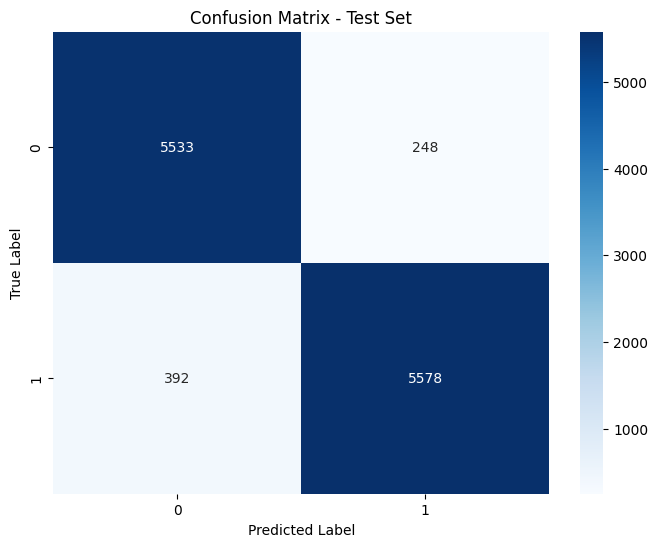

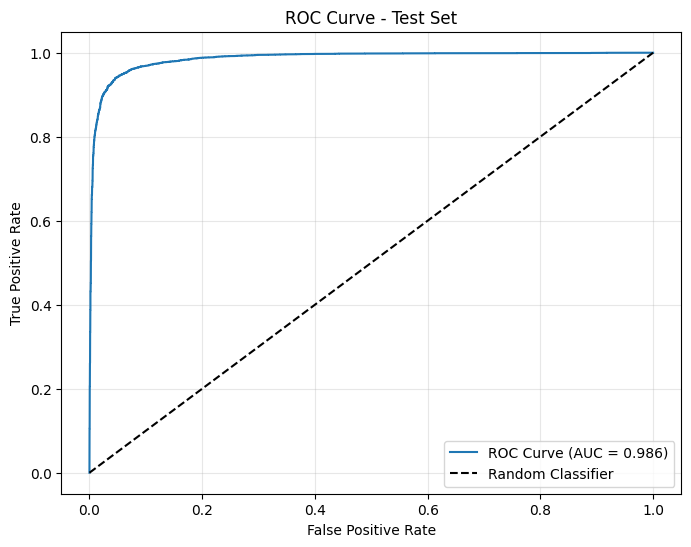


AUC Score: 0.9861


In [49]:
# Comprehensive Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Move logits to CPU if on GPU
logits_cpu = logits.cpu() if hasattr(logits, 'cpu') else logits

# Convert to numpy array for sklearn
logits_np = logits_cpu.numpy() if hasattr(logits_cpu, 'numpy') else logits_cpu

# Classification Report
print("="*50)
print("CLASSIFICATION REPORT")
print("="*50)
print(classification_report(labels, preds))

# Confusion Matrix
cm = confusion_matrix(labels, preds)
print("\nCONFUSION MATRIX:")
print(cm)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Set')
plt.show()

# ROC Curve & AUC (for binary classification)
# Compute softmax probabilities
probs = np.exp(logits_np) / np.exp(logits_np).sum(axis=1, keepdims=True)
# Get probabilities for class 1
probs_class1 = np.asarray(probs[:, 1]).flatten()

auc_score = roc_auc_score(labels, probs_class1)
fpr, tpr, thresholds = roc_curve(labels, probs_class1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nAUC Score: {auc_score:.4f}")

In [50]:
# Additional Metrics: Precision, Recall per Class
from sklearn.metrics import precision_score, recall_score

print("="*50)
print("PER-CLASS METRICS")
print("="*50)
precision_0 = precision_score(labels, preds, pos_label=0, zero_division=0)
recall_0 = recall_score(labels, preds, pos_label=0, zero_division=0)
precision_1 = precision_score(labels, preds, pos_label=1, zero_division=0)
recall_1 = recall_score(labels, preds, pos_label=1, zero_division=0)

print(f"Class 0 (Negative) - Precision: {precision_0:.4f}, Recall: {recall_0:.4f}")
print(f"Class 1 (Positive) - Precision: {precision_1:.4f}, Recall: {recall_1:.4f}")

# Weighted Accuracy
from sklearn.metrics import balanced_accuracy_score
balanced_acc = balanced_accuracy_score(labels, preds)
print(f"\nBalanced Accuracy: {balanced_acc:.4f}")

# Summary
print("\n" + "="*50)
print("MODEL EVALUATION SUMMARY")
print("="*50)
print(f"Accuracy:         {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"F1 Score (macro): {f1:.4f}")
print(f"AUC Score:        {auc_score:.4f}")
print(f"Total Test Samples: {len(labels)}")


PER-CLASS METRICS
Class 0 (Negative) - Precision: 0.9338, Recall: 0.9571
Class 1 (Positive) - Precision: 0.9574, Recall: 0.9343

Balanced Accuracy: 0.9457

MODEL EVALUATION SUMMARY
Accuracy:         0.9455
Balanced Accuracy: 0.9457
F1 Score (macro): 0.9455
AUC Score:        0.9861
Total Test Samples: 11751


In [51]:
example = {"tweet": "أنا حزين جدًا اليوم! 😊"}

In [52]:
tokenized_example =tokenize_function(example)

In [53]:
import torch

# Prepare inputs from the already-defined `tokenized_example`
device = trainer.model.device if hasattr(trainer.model, "device") else torch.device("cuda" if torch.cuda.is_available() else "cpu")
trainer.model.to(device)

inputs = {}
for k, v in tokenized_example.items():
    t = torch.tensor(v, dtype=torch.long)
    if t.dim() == 1:
        t = t.unsqueeze(0)  # add batch dimension
    inputs[k] = t.to(device)

trainer.model.eval()
with torch.no_grad():
    outputs = trainer.model(**inputs)
    logits = outputs.logits
    probs = torch.softmax(logits, dim=-1)
    pred = torch.argmax(logits, dim=-1).cpu().item()

print("logits:", logits.cpu().numpy())
print("probs:", probs.cpu().numpy())
print("predicted label:", pred)

logits: [[ 1.4498652 -1.2439374]]
probs: [[0.93666    0.06334005]]
predicted label: 0


In [54]:
tokenizer.push_to_hub("arabic-sentiment-model")

README.md: 0.00B [00:00, ?B/s]

No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/7beshoyarnest/arabic-sentiment-model/commit/fd83428491cb382cf6952553ad67ee22003b97f4', commit_message='Upload tokenizer', commit_description='', oid='fd83428491cb382cf6952553ad67ee22003b97f4', pr_url=None, repo_url=RepoUrl('https://huggingface.co/7beshoyarnest/arabic-sentiment-model', endpoint='https://huggingface.co', repo_type='model', repo_id='7beshoyarnest/arabic-sentiment-model'), pr_revision=None, pr_num=None)

In [55]:
# Save trained model and tokenizer locally
# This saves the model weights and tokenizer files into `save_dir` so you can load them later.
import os
save_dir = "/content/saved_arabic_sentiment_model"

# Prefer Trainer.save_model as it also saves the best model when using Trainer
try:
    trainer.save_model(save_dir)
except Exception:
    # fallback to explicit save
    model.save_pretrained(save_dir)

# Save tokenizer explicitly
tokenizer.save_pretrained(save_dir)

print(f"Model and tokenizer saved to: {save_dir}")
print(os.listdir("/content"))

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...t-model/training_args.bin: 100%|##########| 5.84kB / 5.84kB            

  ...t-model/model.safetensors:   6%|6         | 33.5MB /  543MB            

Model and tokenizer saved to: /content/saved_arabic_sentiment_model
['.config', 'saved_arabic_sentiment_model', 'arabic-sentiment-model', 'sample_data']


In [58]:
!ls -lh /content


total 482M
drwxr-xr-x 5 root root 4.0K Dec 13 15:12 arabic-sentiment-model
drwxr-xr-x 1 root root 4.0K Dec  9 14:42 sample_data
drwxr-xr-x 2 root root 4.0K Dec 13 15:12 saved_arabic_sentiment_model
-rw-r--r-- 1 root root 482M Dec 13 15:18 saved_arabic_sentiment_model.zip


In [59]:
import shutil
from google.colab import files

shutil.make_archive("/content/saved_arabic_sentiment_model", 'zip', save_dir)
files.download("/content/saved_arabic_sentiment_model")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

save_dir = r"C:\Users\AL-MASA\Desktop\End_to_End_AI_Projects\Arbic_Sentiment_Analysis\saved_arabic_sentiment_model"  # where you unzipped it

tokenizer = AutoTokenizer.from_pretrained(save_dir, local_files_only=True)
model = AutoModelForSequenceClassification.from_pretrained(save_dir, local_files_only=True)
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(64787, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [8]:
import torch
import numpy as np
def predict_text(text,tokenizer=tokenizer,model=model,device=None):
    is_single = isinstance(text, str)

    model_device = (
        device
        if device is not None
        else (
            model.device if hasattr(model, "device")
            else (torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu"))
        )
    )

    model.to(model_device)
    model.eval()

    # Tokenize — pad only when batch
    inputs = tokenizer(
        text,
        truncation=True,
        padding=not is_single,
        return_tensors="pt"
    )
    inputs = {k: v.to(model_device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits.detach().cpu().numpy()

        # softmax
        probs = np.exp(logits) / np.exp(logits).sum(axis=1, keepdims=True)

        # predicted class index
        preds = logits.argmax(axis=-1).astype(int)
        

    # Return label + score
    results = [
        {
            "label": int(preds[i]),
            "sentiment": "Positive" if preds[i]==1 else "Negative",
            "score": float(probs[i][preds[i]])
        }
        for i in range(len(preds))
    ]

    return results[0] if is_single else results


In [14]:
texts = [
    "انا سعيد جدًا اليوم!",
    "انا حزين جدًا اليوم",
    "الطقس جميل اليوم."
]

# Tell the function this is NOT a single input
results = predict_text(text=texts)

for r in results:
    print("Label:", r["label"])
    print("Sentiment:", r['sentiment'])
    print("Score:", r["score"])

Label: 1
Sentiment: Positive
Score: 0.5269334316253662
Label: 0
Sentiment: Negative
Score: 0.866966724395752
Label: 1
Sentiment: Positive
Score: 0.9173260927200317


In [10]:
# using the saved model and tokenizer from huggingface hub
from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("7beshoyarnest/arabic-sentiment-model")
model = AutoModelForSequenceClassification.from_pretrained("7beshoyarnest/arabic-sentiment-model")

tokenizer_config.json: 0.00B [00:00, ?B/s]

f:\Apps\Anaconda\envs\cs224n\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\AL-MASA\.cache\huggingface\hub\models--7beshoyarnest--arabic-sentiment-model. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/646 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

In [11]:
from transformers import pipeline
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
example_texts = [
    "أنا سعيد جدًا اليوم!",
    "هذا أسوأ يوم في حياتي",
]
print("Pipeline results:")
print(nlp(example_texts))

Device set to use cuda:0


Pipeline results:
[{'label': 'LABEL_1', 'score': 0.6968767642974854}, {'label': 'LABEL_0', 'score': 0.8638149499893188}]
